In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
train_data = np.load('./NN_MNIST/MNIST/train_data.npy')
train_labels = np.load('./NN_MNIST/MNIST/train_labels.npy')

test_data = np.load('./NN_MNIST/MNIST/test_data.npy')
test_labels = np.load('./NN_MNIST/MNIST/test_labels.npy')

In [3]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(7500, 784) (7500,) (1000, 784) (1000,)


In [6]:
#help(np.unique)

In [4]:
train_digits, train_counts = np.unique(train_labels, return_counts=True)
test_digits, test_counts = np.unique(test_labels, return_counts=True)
print(dict(zip(train_digits, train_counts)))
print(dict(zip(test_digits, test_counts)))

{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


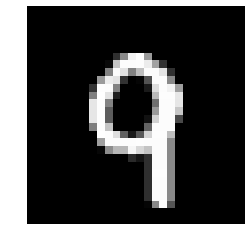

Label 9


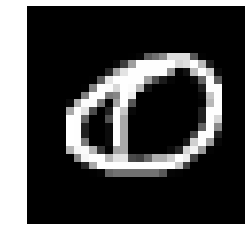

Label 0


In [5]:
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape(28,28), cmap=plt.cm.gray)
    plt.show()
    return

def vis_image(index, dataset='train'):
    if (dataset=='train'):
        show_digit(train_data[index,:])
        label = train_labels[index]
    else:
        show_digit(test_data[index,:])
        label = test_labels[index]
    print("Label " + str(label))
    return

vis_image(0, 'train')
vis_image(0, 'test')

In [6]:
def squared_dist(x, y):
    return np.sum(np.square(x-y))

print("From 7 to 1: ", squared_dist(train_data[4,], train_data[5,]))

From 7 to 1:  5357193.0


In [7]:
def find_NN(x):
    distance = [squared_dist(x, train_data[i,]) for i in range(len(train_labels))]
    return np.argmin(distance)

def NN_classifier(x):
    index = find_NN(x)
    return train_labels[index]

NN classification:  0
True label:  0
the test image


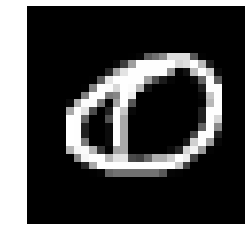

Label 0
The nearest neighbor


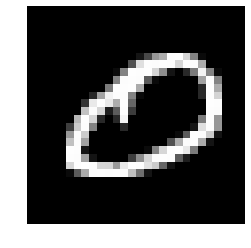

Label 0


In [8]:
test_case = 0
pred_index = NN_classifier(test_data[test_case,])
print("NN classification: ", pred_index)
print("True label: ", test_labels[test_case])
print("the test image")
vis_image(test_case, 'test')
print("The nearest neighbor")
vis_image(find_NN(test_data[test_case,]), 'train')

In [9]:
test_predictions = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]
err_pos = np.not_equal(test_predictions, test_labels)
print(np.sum(err_pos))

46


In [12]:
e1 = test_labels[err_pos]
e1_label, e1_count = np.unique(e1, return_counts=True)
print(dict(zip(e1_label, e1_count)))

{0: 1, 2: 6, 3: 9, 4: 3, 5: 2, 6: 1, 7: 6, 8: 8, 9: 10}


In [19]:
len(err_pos)
print(err_pos[:10])

[False False False False False False False False False False]


In [21]:
wrong_ind = [i for i in range(len(test_labels)) if err_pos[i]]
#wrong_ind

predicted:  5


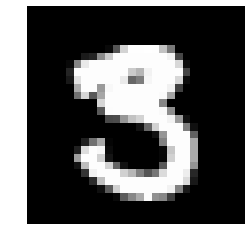

Label 3


In [70]:
ind = wrong_ind[45]
print('predicted: ', test_predictions[ind])
vis_image(ind, 'test')

In [71]:
from sklearn.neighbors import BallTree

In [72]:
ball_tree = BallTree(train_data)

In [73]:
help(np.squeeze)

Help on function squeeze in module numpy:

squeeze(a, axis=None)
    Remove single-dimensional entries from the shape of an array.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        .. versionadded:: 1.7.0
    
        Selects a subset of the single-dimensional entries in the
        shape. If an axis is selected with shape entry greater than
        one, an error is raised.
    
    Returns
    -------
    squeezed : ndarray
        The input array, but with all or a subset of the
        dimensions of length 1 removed. This is always `a` itself
        or a view into `a`.
    
    Raises
    ------
    ValueError
        If `axis` is not `None`, and an axis being squeezed is not of length 1
    
    See Also
    --------
    expand_dims : The inverse operation, adding singleton dimensions
    reshape : Insert, remove, and combine dimensions, and resize existing ones
    
    Examples
    --------
    >>>

In [ ]:
from sklearn.neighbors import BallTree

## Build nearest neighbor structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Verify that the predictions are the same
print("Ball tree produces same predictions as above? ", np.array_equal(test_predictions, ball_tree_predictions))